In [1]:
import json
import os

root_directory = (os.path.dirname(os.getcwd()))

json_file_list = ['processed/RESULTS5-2A-EnergyPlus-9.0.1.json']

json_data = {}
for f in json_file_list:
    file_path = os.path.join(root_directory, f) 
    with open(file_path, 'r') as jf:
        data = json.load(jf)
        json_data[str(os.path.basename(f)).replace('.json', '')] = data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget
%matplotlib inline

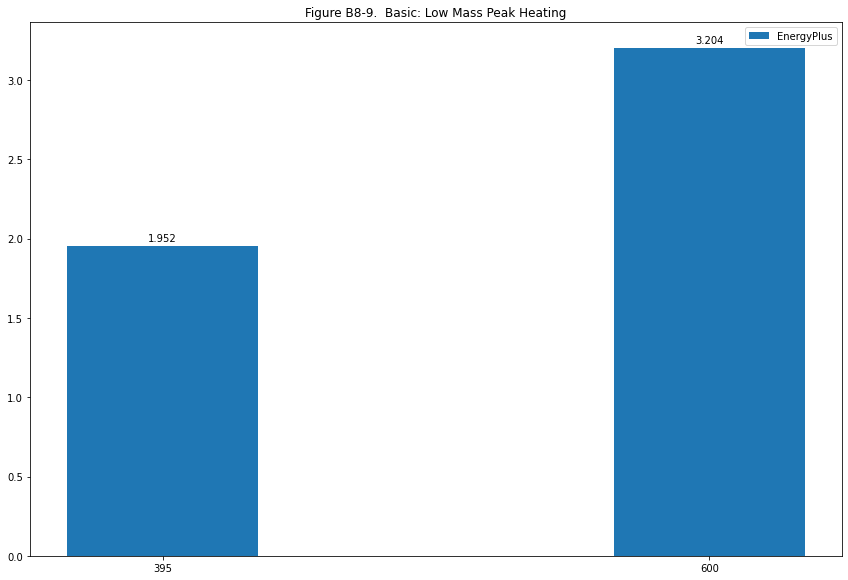

In [3]:
# Fig B8-9
import numpy as np

labels = []
data = []
for tst, json_obj in json_data.items():
    data.append(json_obj['conditioned_zone_loads_non_free_float']['395']['peak_heating_kW'])
    labels.append('395')
    data.append(json_obj['conditioned_zone_loads_non_free_float']['600']['peak_heating_kW'])
    labels.append('600')

fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True)
fig.tight_layout()
x = np.arange(len(labels))
width = 0.35
rects1 = ax.bar(x, data, width, label='EnergyPlus')

ax.set_xticks(x)
ax.set_title('Figure B8-9.  Basic: Low Mass Peak Heating')
ax.set_xticklabels(labels)
ax.bar_label(rects1, padding=3)
ax.legend()

plt.show();